### *Source List:*
- https://www.geeksforgeeks.org/permutation-and-combination-in-python/
- https://pypi.org/project/nba-api/
- https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb
- https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook
- https://pynative.com/python-random-randrange/#:~:text=Use%20randint()%20Generate%20random,8%20%2C9%2C%2010%5D
- https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
- https://www.kite.com/python/answers/how-to-rename-a-dictionary-key-in-python#:~:text=Use%20dict.,dictionary%20key%20to%20this%20value.
- https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python#:~:text=Set%20the%20figsize%20argument%20in,pyplot.&text=Save%20the%20result%20to%20a,to%20change%20the%20figure%20size.
- https://basketball.realgm.com/nba/draft/lottery_results/1985
- https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook

### *This notebook has the same functionality as 'vadali_abhi_nbadraftlottery_montecarlosimulation.ipynb', however, it simply abstracts away all the functions through a separate .py file, making it easier for the user to interact with the simulator. For more details on the code, visit 'vadali_abhi_nbadraftlottery_montecarlosimulation.ipynb'.*

In [2]:
#importing the required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations, permutations
from collections import Counter
import random
import time

from matplotlib import rc, animation
rc('animation', html='html5')
from ipywidgets import Image
from IPython import display
import scipy.stats as ss
from numpy.random import multinomial

from nbadraftlottery_functions import *


Welcome to this NBA Draft Lottery Simulator!
This Simulator contains a variety of different options to simulate:

If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r

If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a

If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w

If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution 
to produce independent results for each team, your code is the letter: m

If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o

If you would like to quit, your code is the letter: q

Please enter your code: r

Please enter the number of iterations you would like to carry out: 10

NBA DRAFT LOTTERY ITERATION:  1



Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5735626220703125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002548694610595703 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003933906555175781 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00021791458129882812 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000392913818359375 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002510547637939453 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000259876251220703

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002980232238769531 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00017786026000976562 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024390220642089844 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00038504600524902344 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Toronto Raptors

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002841949462890625 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001840591430664062

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00043582916259765625 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00019502639770507812 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002739429473876953 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023293495178222656 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023317337036132812 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000252246856689

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003902912139892578 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00021195411682128906 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002880096435546875 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003459453582763672 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001709461212158203 seconds elapsed...
Shuffling ping pong balls;  0.0005049705505371094 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  5.9604644775390625e

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00027108192443847656 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002002716064453125 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004820823669433594 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003180503845214844 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00040602684020996094 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002040863

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.000431060791015625 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00041174888610839844 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00026702880859375 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023794174194335938 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00017571449279785156 seconds elapsed...
Shuffling ping pong balls;  0.0003819465637207031 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  5.0067901611328

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004677772521972656 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030803680419921875 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.008816242218017578 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002932548522949219 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00020194053649902344 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000272989273071

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2874603271484375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005300045013427734 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002841949462890625 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00017690658569335938 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002269744873046875 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024080276489257812 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00037598

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006470680236816406 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00030112266540527344 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003600120544433594 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00038313865661621094 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00033593177795410156 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000287055969238

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0011179447174072266 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00036716461181640625 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003027915954589844 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00038695335388183594 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0251998901367188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003650188446044922 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00041079521179199

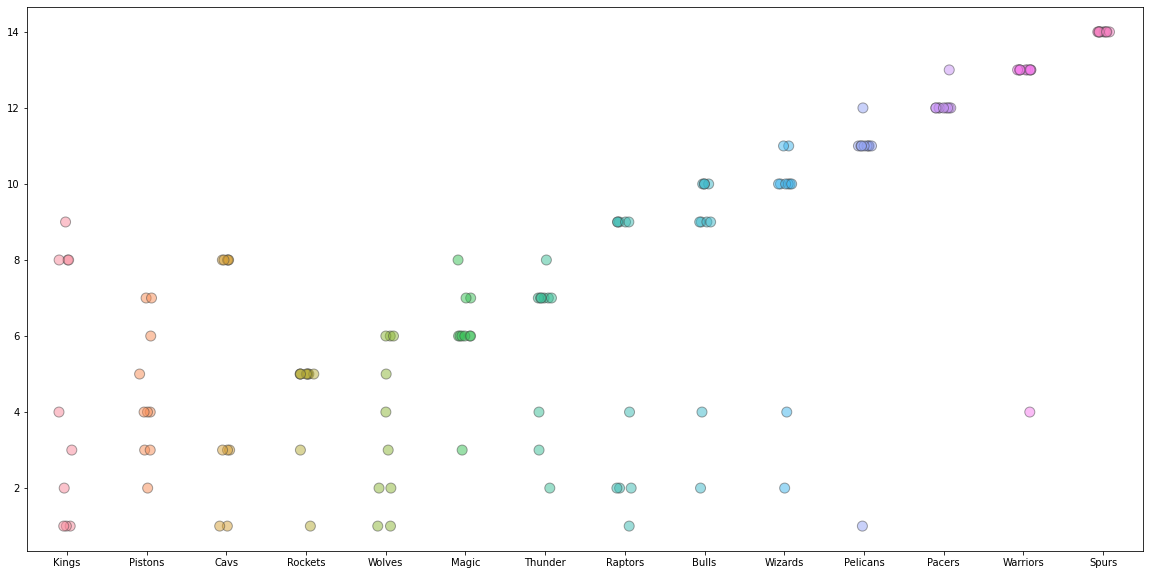


Welcome to this NBA Draft Lottery Simulator!
This Simulator contains a variety of different options to simulate:

If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r

If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a

If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w

If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution 
to produce independent results for each team, your code is the letter: m

If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o

If you would like to quit, your code is the letter: q

Please enter your code: a

Please enter the number of iterations you would like to carry out: 2

NBA DRAFT LOTTERY ITERATION:  1



Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.002716064453125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002720355987548828 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001971721649169922 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022077560424804688 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  4.291534423828125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002009868621826172 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Chicago Bulls

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001728534698486328 seconds elapsed...
Shuffling ping pong balls;  0.0003788471221923828 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  5.9604644775390625e-06 

The chosen ball is:  6
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00026488304138183594 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024700164794921875 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023698806762695312 seconds elapsed...
The chosen ball is:  4

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002751350402832031 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00029087066650390625 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023865699768066406 seconds elapsed...
The chosen ball is:  14


Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00034308433532714844 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000270843505859375 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021982192993164062 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.3828277587890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006749629974365234 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002968311309814453 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000224113464355468

Shuffling ping pong balls;  0.0004119873046875 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024819374084472656 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002639293670654297 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002689361572265625 seconds elapsed...
The chosen ball is:  8

The number # 8  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002319812774658203 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026607513427734375 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  

Shuffling ping pong balls;  0.008058786392211914 seconds elapsed...
The chosen ball is:  9

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031185150146484375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031685829162597656 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00029587745666503906 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003600120544433594 seconds elapsed...
The chosen ball is:  7

Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00033092498779296875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;

Shuffling ping pong balls;  0.000308990478515625 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003750324249267578 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003910064697265625 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00037097930908203125 seconds elapsed...
The chosen ball is:  10

Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006248950958251953 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00037217140197753906 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong ball

The chosen ball is:  14
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007569789886474609 seconds elapsed...
The chosen ball is:  6

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010008811950683594 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007081031799316406 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005748271942138672 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.00020503997802734375 seconds elapsed...
The chosen ball is:  14

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0011229515075683594 seconds elapsed...
The chosen ball is:  9
Shuff

Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005476474761962891 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  1.3828277587890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002288818359375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026702880859375 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019288063049316406 seconds elapsed...
The chosen ball is:  8

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00020313262939453125 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021219253540039062 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.86

Shuffling ping pong balls;  0.0004239082336425781 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002319812774658203 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026106834411621094 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022792816162109375 seconds elapsed...
The chosen ball is:  8

Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030994415283203125 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023508071899414062 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong ball

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.013551950454711914 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00035381317138671875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003559589385986328 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003139972686767578 seconds elapsed...
The chosen ball is:  9

Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031876564025878906 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003440380096435547 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;

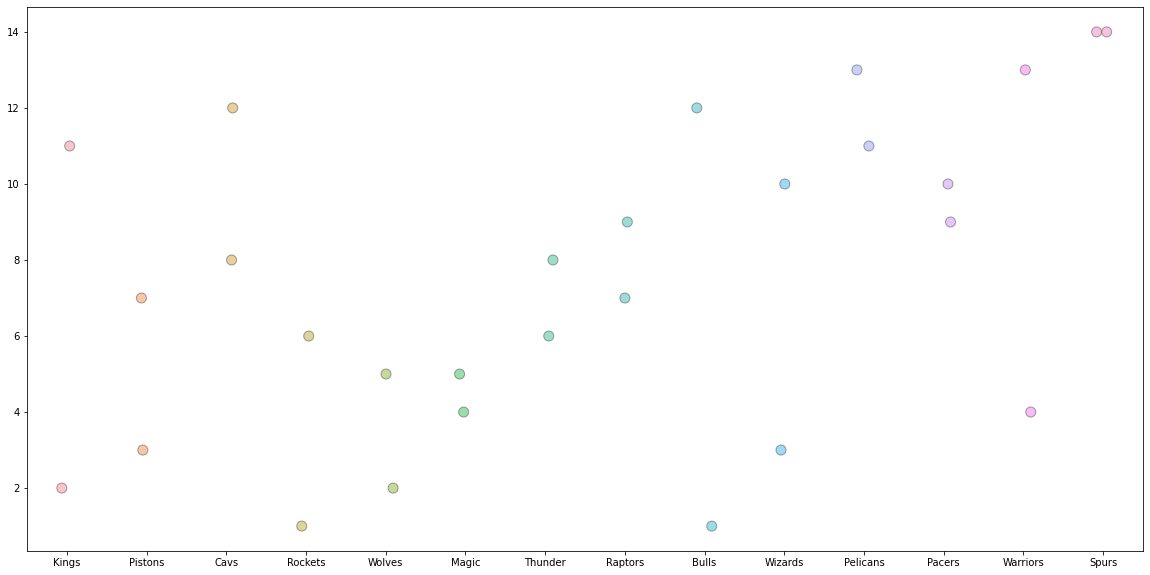


Welcome to this NBA Draft Lottery Simulator!
This Simulator contains a variety of different options to simulate:

If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r

If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a

If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w

If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution 
to produce independent results for each team, your code is the letter: m

If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o

If you would like to quit, your code is the letter: q

Please enter your code: w

Please enter the number of iterations you would like to carry out: 100

NBA DRAFT LOTTERY ITERATION:  1

The Wil

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.00039076805114746094 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0009961128234863281 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002980232238769531 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00025200843811035156 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.001178741455078125 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001642704010009765

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0728836059570312e-05 seconds elapsed...
Shuffling ping pong balls;  0.00019478797912597656 seconds elapsed...
Shuffling ping pong balls;  0.00048089027404785156 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019407272338867188 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.000308990478515625 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002932548522949219 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Toronto Raptors

Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023221969604492188 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.10623168945312

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2874603271484375e-05 seconds elapsed...
Shuffling ping pong balls;  0.00034117698669433594 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024819374084472656 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023818016052246094 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00027298927307128906 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00020194053649902344 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018310546875 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  4.887580871582031e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004429817199707031 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002448558807373047 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00020599365234375 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001850128173828125 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021791458129882812 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023722648620605

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.430511474609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004570484161376953 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002219676971435547 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018405914306640625 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00025391578674316406 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00026106834411621094 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002012252807

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002810955047607422 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004239082336425781 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021505355834960938 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019407272338867188 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023603439331054688 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018882751464

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004470348358154297 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026226043701171875 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002620220184326172 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.245208740234375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002541542053222656 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031876564025878906 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002341270446777343

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.7881393432617188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007688999176025391 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008471012115478516 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0014789104461669922 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00034999847412109375 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005469322204589844 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.000510931

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.430511474609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004570484161376953 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003871917724609375 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003628730773925781 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.001094818115234375 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005559921264648438 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005288124084472656 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004680156707763672 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004191398620605469 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004889965057373047 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005650520324707031 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004940032958984375 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003960132598876

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004940032958984375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00047206878662109375 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00042700767517089844 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0014188289642333984 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005228519439697266 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.000442028045

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006136894226074219 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004909038543701172 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006780624389648438 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004837512969970703 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005168914794921875 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006949901580810547

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003960132598876953 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006320476531982422 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007891654968261719 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006461143493652344 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  1.621246337890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0012731552124023438 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006282329559326

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002791881561279297 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002522468566894531 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002682209014892578 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018978118896484375 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.00016617774963378906 seconds elapsed...
Shuffling ping pong balls;  0.0004401206970214844 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  5.245208740234375e-06

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00036406517028808594 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022101402282714844 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004169940948486328 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00028586387634277344 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018787384033203125 seconds elapsed...
Shuffling ping pong balls;  0.00042176246643066406 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004448890686035156 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00036716461181640625 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024700164794921875 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002570152282714844 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004150867462158203 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.71661376953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004000663757324219

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00031280517578125 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00035190582275390625 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002758502960205078 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005669593811035156 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000335693359375 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002689361572265625 seco

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.193450927734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003638267517089844 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003750324249267578 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002849102020263672 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026607513427734375 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00028705596923828125 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00033998489

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.4080276489257812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004181861877441406 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022292137145996094 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003800392150878906 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003807544708251953 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00047016143798828125 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.001427173614501953

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006680488586425781 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004322528839111328 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  5.245208740234375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007171630859375 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005319118499755859 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005331039428710938 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021195411682128906 sec

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005788803100585938 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002827644348144531 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00046181678771972656 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004830360412597656 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004811286926269531 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031280517578125 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005421638488769531 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009632110595703125 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030422210693359375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0016829967498779297 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006546974182128906 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.3909759521484375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002853870391845703

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00074005126953125 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004470348358154297 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0024619102478027344 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006561279296875 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00029397010803222656 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.00063014030456542

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003218650817871094 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  2.09808349609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003781318664550781 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002510547637939453 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019502639770507812 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Charlotte Hornets

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00036907196044921875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.00027322769165039

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.5033950805664062e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004401206970214844 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002269744873046875 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002238750457763672 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021505355834960938 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00025081634521484375 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000269174575805664

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005269050598144531 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003879070281982422 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031304359436035156 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024700164794921875 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00025773048400878906 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.000345230102539

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.52587890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002779960632324219 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002677440643310547 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002598762512207031 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003838539123535156 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005109310150146484 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003829002380371094 seconds

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00037026405334472656 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003693103790283203 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003190040588378906 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030303001403808594 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  San Antonio Spurs

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004470348358154297 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00018572807312

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00041985511779785156 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003170967102050781 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00040030479431152344 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003418922424316406 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Golden State Warriors

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004019737243652344 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00044918060

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005230903625488281 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021910667419433594 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003948211669921875 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003838539123535156 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005271434783935547 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00045490264892578

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0013818740844726562 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00040793418884277344 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0008699893951416016 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004868507385253906 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004429817199707031 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004620552062988281 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003190040588378906 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.000453948974609375 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004942417144775391 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0017819404602050781 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0009160041809082031 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003581047058105469

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010259151458740234 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004858970642089844 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00048613548278808594 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005099773406982422 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  2.09808349609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010809898376464844 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.000463008880615

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3828277587890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.001071929931640625 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005860328674316406 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00025391578674316406 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005500316619873047 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Charlotte Hornets

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0008428096771240234 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.000711917877197

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.9073486328125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005571842193603516 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002090930938720703 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002079010009765625 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022411346435546875 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002129077911376953 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001621246337890

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0001990795135498047 seconds elapsed...
Shuffling ping pong balls;  0.0006952285766601562 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00047707557678222656 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00031685829162597656 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018310546875 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023698806762695312 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.3113021850585

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005810260772705078 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00017118453979492188 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005769729614257812 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023889541625976562 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Chicago Bulls

Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00030994415283203125 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00022673606872558

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004010200500488281 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024199485778808594 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022602081298828125 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023293495178222656 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009338855743408203 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00036287307739257

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.7881393432617188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006158351898193359 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004029273986816406 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003609657287597656 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003371238708496094 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002880096435546875 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00033211708068

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007460117340087891 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003421306610107422 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003440380096435547 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004291534423828125 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Toronto Raptors

Shuffling ping pong balls;  2.574920654296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005900859832763672 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003898143768310547 se

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007627010345458984 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007600784301757812 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005671977996826172 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010802745819091797 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005428791046142578 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004711151123046875

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005190372467041016 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0251998901367188e-05 seconds elapsed...
Shuffling ping pong balls;  0.00019121170043945312 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003921985626220703 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005047321319580078 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Indiana Pacers

Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004749298095703125 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.000446796417236328

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006399154663085938 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  5.7220458984375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0008978843688964844 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007398128509521484 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006008148193359375 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.001004934310913086 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000537872314453125 se

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.71661376953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023603439331054688 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00078582763671875 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003478527069091797 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006341934204101562 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Golden State Warriors

Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0014808177947998047 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006430149078369

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.811981201171875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008139610290527344 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009007453918457031 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007281303405761719 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0008840560913085938 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Washington Wizards

Shuffling ping pong balls;  1.5735626220703125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005581378936767578 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002212524414

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002961158752441406 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022411346435546875 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006768703460693359 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.5735626220703125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0011129379272460938 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00019502639770507812 seconds elapsed...
Shuffling ping pong balls;  0.0003840923309326172 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.9141387939453125e

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.7881393432617188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005786418914794922 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.430511474609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004611015319824219 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004928112030029297 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003421306610107422 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002560615539550781 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002160072326660

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.621246337890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004360675811767578 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003082752227783203 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00044608116149902344 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002357959747314453 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00025177001953125 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002348423004150

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00042176246643066406 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002617835998535156 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024175643920898438 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003218650817871094 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003120899200439453 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002200603

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.00044989585876464844 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0009739398956298828 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003337860107421875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031304359436035156 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005078315734863281 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002949237823

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002238750457763672 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.71661376953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008831024169921875 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00039887428283691406 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004439353942871094 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Charlotte Hornets

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00043702125549316406 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000683069229125

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005931854248046875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000331878662109375 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00044608116149902344 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005509853363037109 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Indiana Pacers

Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005092620849609375 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00061798095703125 sec

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006558895111083984 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000598907470703125 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006792545318603516 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005462169647216797 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006158351898193359 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004649162

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2874603271484375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002880096435546875 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002429485321044922 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023603439331054688 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002410411834716797 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002307891845703125 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003020763397216797 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.004941225051879883 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  2.5987625122070312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006339550018310547 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00043129920959472656 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005917549133300781 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009789466857910156 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00052189826965332

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002560615539550781 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003859996795654297 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003921985626220703 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031113624572753906 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00040602684020996094 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.000352144241

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.71661376953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00042319297790527344 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003712177276611328 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003619194030761719 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00033783912658691406 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00042319297790527344 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031471252441406

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00047516822814941406 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00039315223693847656 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003762245178222656 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005040168762207031 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003497600555419922 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003550052642822

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  5.2928924560546875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006928443908691406 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004429817199707031 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00041222572326660156 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0009210109710693359 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00017905235290527344 seconds elapsed...
Shuffling ping pong balls;  0.0010101795196533203 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.9604644775

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007658004760742188 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004570484161376953 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007281303405761719 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00046896934509277344 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004248619079589844 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.000530958

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0013179779052734375 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007579326629638672 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005929470062255859 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004940032958984375 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005986690521240234 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000528097152

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00028896331787109375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021409988403320312 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002732276916503906 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002598762512207031 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Charlotte Hornets

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002701282501220703 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000193119049072

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003457069396972656 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001862049102783203 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002269744873046875 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.00022029876708984375 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002231597900390625 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019192695617675

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005571842193603516 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003447532653808594 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002231597900390625 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  4.0531158447265625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026488304138183594 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002841949462890625 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.000308990478

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00034880638122558594 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00045800209045410156 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023102760314941406 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00039005279541015625 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002560615539550781 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030803680419

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3828277587890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004830360412597656 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004379749298095703 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00030517578125 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002689361572265625 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003299713134765625 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00046086311340332

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007219314575195312 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00047469139099121094 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003941059112548828 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003058910369873047 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003681182861328125 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003290176391601

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.384185791015625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005667209625244141 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007269382476806641 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00036025047302246094 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006229877471923828 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000408172607421875 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000581026077270

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006620883941650391 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006852149963378906 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00046181678771972656 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004138946533203125 seconds elapsed...
The chosen ball is:  12

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004951953887939453 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000447988510

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.4080276489257812e-05 seconds elapsed...
Shuffling ping pong balls;  0.00042176246643066406 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004067420959472656 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004820823669433594 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  5.698204040527344e-05 seconds elapsed...
Shuffling ping pong balls;  0.0017659664154052734 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005240440368652344 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002591609954833984

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.193450927734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006778240203857422 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003311634063720703 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.005126953125 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005080699920654297 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00031185150146484375 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005819797515869141 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023293495178222656 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  1.7881393432617188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005040168762207031 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006029605865478516 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.0008618831634521484 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Washington Wizards

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004999637603759766 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007112026214599

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010712146759033203 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010001659393310547 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00024700164794921875 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005979537963867188 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006048679351806641 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001740455627441

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0010690689086914062 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.002164125442504883 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003712177276611328 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007150173187255859 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007266998291015625 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007359981536865234 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00018787384033203125 seconds elapsed...
Shuffling ping pong balls;  0.0003941059112548828 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002770423889160156 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000171661376953125 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001709461212158203 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00024890899658203125 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.120567321777

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5974044799804688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00039505958557128906 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023889541625976562 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00029206275939941406 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00030994415283203125 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002040863037109375 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00019097

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00033473968505859375 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002899169921875 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00027298927307128906 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002269744873046875 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002789497375488281 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002281665802001953 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.00035190582275390625 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002732276916503906 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002970695495605469 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003361701965332031 seconds elapsed...
The chosen ball is:  7

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00034499168395996094 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009391307830810547

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.621246337890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006601810455322266 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003650188446044922 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003108978271484375 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004177093505859375 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003180503845214844 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.6689300537109375e-05 seconds elapsed...
Shuffling ping pong balls;  0.00078582763671875 sec

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.00048804283142089844 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004589557647705078 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005540847778320312 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0012853145599365234 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004429817199707031 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000536203

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005900859832763672 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.000335693359375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  9.775161743164062e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004448890686035156 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.007793903350830078 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006499290466308594 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006411075592041016 sec

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00026488304138183594 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006999969482421875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0014650821685791016 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.000637054443359375 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006229877471923828 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000977993011

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1682510375976562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002338886260986328 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.000225067138671875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003120899200439453 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00016307830810546875 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003490447998046875 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000194072723388

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.6927719116210938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005509853363037109 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00026607513427734375 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.00021505355834960938 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0001819133758544922 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002999305725097656 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023484230041503

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2874603271484375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005750656127929688 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00037789344787597656 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00046896934509277344 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002338886260986328 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Charlotte Hornets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004341602325439453 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031089782714843

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.000453948974609375 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005397796630859375 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002722740173339844 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008099079132080078 seconds elapsed...
The chosen ball is:  4

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008671283721923828 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003788471221923828 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005221366882324219 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0011951923370361328 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008513927459716797 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004298686981201172 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.000453948974609375 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005810260772705078 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008518695831298828 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006582736968994141 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0006520748138427734 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009570121765136719 seconds elapsed...
The chosen ball is:  8

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008919239044189453 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0012810230255126953 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00036716461181640625 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031113624572753906 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.2636184692382812e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004918575286865234 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003619194030761719 seconds elapsed...
The chosen ball is:  13

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00033593177795410156 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004301071166

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.170967102050781e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004487037658691406 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002989768981933594 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002911090850830078 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.00023674964904785156 seconds elapsed...
The chosen ball is:  3

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00028586387634277344 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.0967254638671875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003912448883056640

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005171298980712891 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008249282836914062 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002732276916503906 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003440380096435547 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00033402442932128906 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000280857086

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.8848648071289062e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004229545593261719 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003800392150878906 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00031304359436035156 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003330707550048828 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Washington Wizards

Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007810592651367188 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.7881393432617188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005869865417

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004048347473144531 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  3.1948089599609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007388591766357422 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002040863037109375 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  4.76837158203125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003769397735595703 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003581047058105469 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004889965057373047

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004801750183105469 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007731914520263672 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004930496215820312 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  5.9604644775390625e-06 seconds elapsed...
Shuffling ping pong balls;  0.00045609474182128906 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004930496215820312 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.000429153442382812

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.3113021850585938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007290840148925781 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00019693374633789062 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0009779930114746094 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004990100860595703 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005617141723632812 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005791187286376953 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.811981201171875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0012428760528564453 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0007729530334472656 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.152557373046875e-06 seconds elapsed...
Shuffling ping pong balls;  0.00057220458984375 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003311634063720703 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Toronto Raptors

Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0006420612335205078 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005967617034912109 s

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009131431579589844 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.2159347534179688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007071495056152344 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.00018715858459472656 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00021314620971679688 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  6.9141387939453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002110004425048828 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  6.198883056640625e-06 seconds elapsed...
Shuffling ping pong balls;  0.0002000331878662109

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004069805145263672 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00035500526428222656 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003459453582763672 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  8.106231689453125e-06 seconds elapsed...
Shuffling ping pong balls;  0.00047707557678222656 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Cleveland Cavaliers

Shuffling ping pong balls;  1.1205673217773438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004181861877441406 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.000538110733

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.1920928955078125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002760887145996094 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  8.344650268554688e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004382133483886719 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000579833984375 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  9.298324584960938e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003273487091064453 seconds elapsed...
The chosen ball is:  11

The number # 1  pick in the 2021 NBA Draft goes to:  Sacramento Kings

Shuffling ping pong balls;  9.059906005859375e-06 seconds elapsed...
Shuffling ping pong balls;  0.0004849433898925781 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004489421844482422 se

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  1.5020370483398438e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008270740509033203 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.0013580322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003857612609863281 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  7.867813110351562e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003840923309326172 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  5.0067901611328125e-06 seconds elapsed...
Shuffling ping pong balls;  0.0003960132598876953 seconds elapsed...
The chosen ball is:  9

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  1.4066696166992188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0007989406585693359 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  8.821487426757812e-06 seconds elapsed...
Shuffling ping pong balls;  0.0005629062652587891

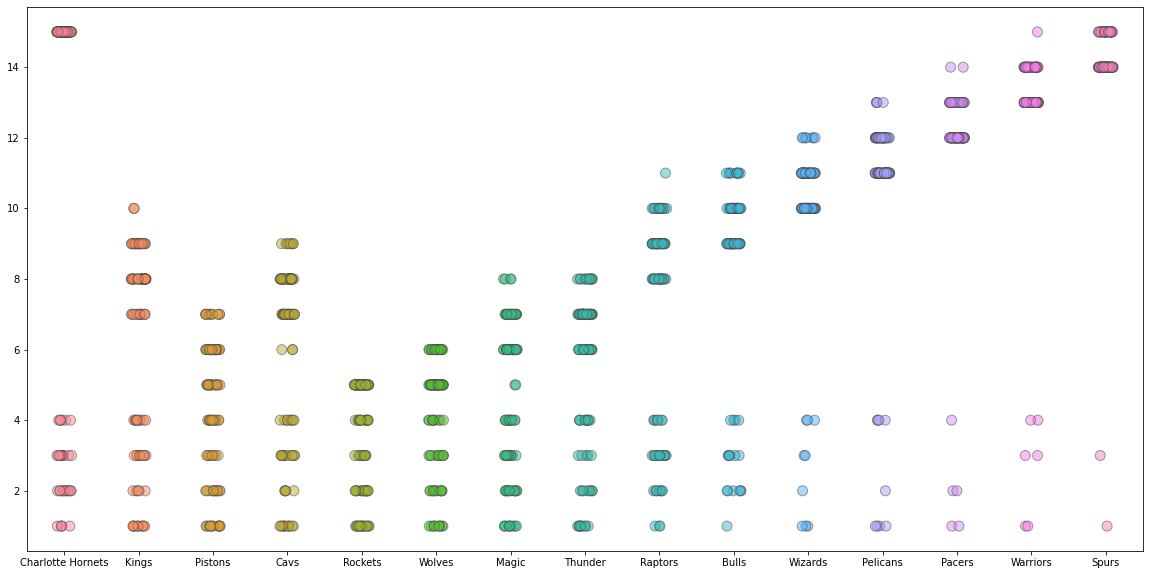


Welcome to this NBA Draft Lottery Simulator!
This Simulator contains a variety of different options to simulate:

If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r

If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a

If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w

If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution 
to produce independent results for each team, your code is the letter: m

If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o

If you would like to quit, your code is the letter: q

Please enter your code: m

Please enter the number of iterations you would like to carry out: 10

NBA DRAFT LOTTERY ITERATION:  1


Houston

Indiana Pacers Pick 9: 0 
Indiana Pacers Pick 10: 0 
Indiana Pacers Pick 11: 0 
Indiana Pacers Pick 12: 85 
Indiana Pacers Pick 13: 7 
Indiana Pacers Pick 14: 0 

Golden State Warriors Pick 1: 2 
Golden State Warriors Pick 2: 4 
Golden State Warriors Pick 3: 0 
Golden State Warriors Pick 4: 2 
Golden State Warriors Pick 5: 0 
Golden State Warriors Pick 6: 0 
Golden State Warriors Pick 7: 0 
Golden State Warriors Pick 8: 0 
Golden State Warriors Pick 9: 0 
Golden State Warriors Pick 10: 0 
Golden State Warriors Pick 11: 0 
Golden State Warriors Pick 12: 0 
Golden State Warriors Pick 13: 91 
Golden State Warriors Pick 14: 1 

San Antonio Spurs Pick 1: 0 
San Antonio Spurs Pick 2: 0 
San Antonio Spurs Pick 3: 0 
San Antonio Spurs Pick 4: 0 
San Antonio Spurs Pick 5: 0 
San Antonio Spurs Pick 6: 0 
San Antonio Spurs Pick 7: 0 
San Antonio Spurs Pick 8: 0 
San Antonio Spurs Pick 9: 0 
San Antonio Spurs Pick 10: 0 
San Antonio Spurs Pick 11: 0 
San Antonio Spurs Pick 12: 0 
San Antonio Spurs

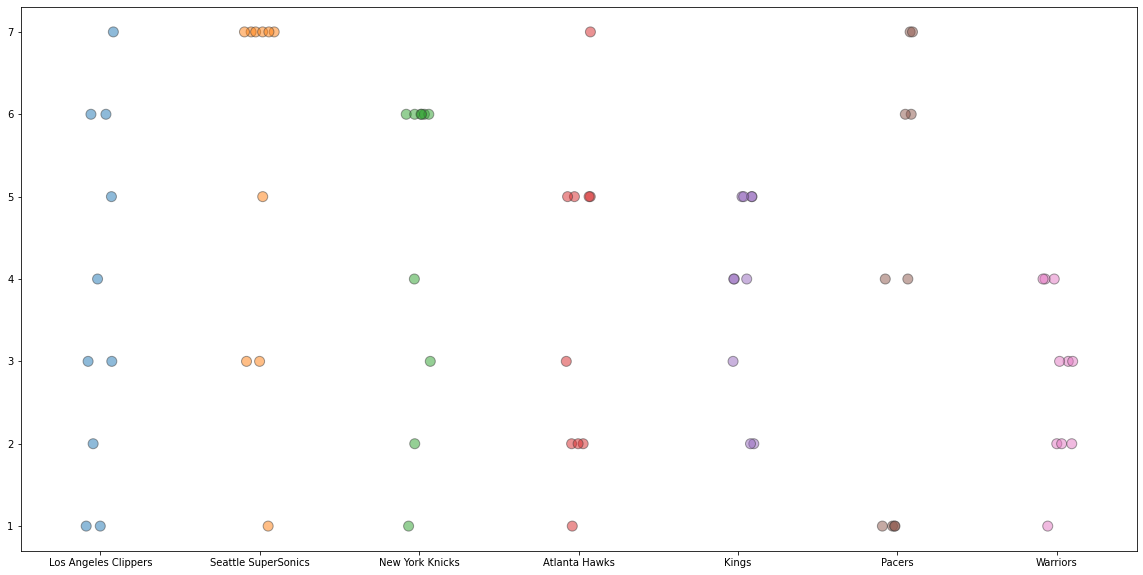


Welcome to this NBA Draft Lottery Simulator!
This Simulator contains a variety of different options to simulate:

If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r

If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a

If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w

If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution 
to produce independent results for each team, your code is the letter: m

If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o

If you would like to quit, your code is the letter: q

Please enter your code: q
Thank you for using this NBA Draft Lottery Simulator!


In [3]:
#main section of code
user_input = 'z'

#handle user input here
while user_input != 'q':
  user_iterations = 1

  print()
  print('Welcome to this NBA Draft Lottery Simulator!')
  print(('This Simulator contains a variety of different options to simulate:'))
  print()
  print(('If you would like to simulate the regular 2021 NBA Draft Lottery, your code is the letter: r'))
  print()
  print(('If you would like to simulate a modified 2021 NBA Draft Lottery, where ping pong balls are drawn for every team, your code is the letter: a'))
  print()
  print(('If you would like to simulate a modified 2021 NBA Draft Lottery, where a wild-card playoff team is invited to join the lottery, your code is the letter: w'))
  print()
  print(('If you would like to simulate a modified 2021 NBA Draft Lottery, that uses a multinomial distribution \nto produce independent results for each team, your code is the letter: m'))
  print()
  print(('If you would like to simulate the conspiracy of the potentially rigged 1985 NBA Draft Lottery, your code is the letter: o'))
  print()
  print(('If you would like to quit, your code is the letter: q'))
  print()
  user_input = str(input('Please enter your code: '))
  user_input = user_input.lower()

  while user_input != 'q' and user_input != 'r' and user_input != 'a' and user_input != 'w' and user_input != 'm' and user_input != 'o' and len(user_input) != 1:
    user_input = str(input('Please re-enter your code, remember you can only choose one of the codes outlined above: '))
    user_input = user_input.lower()

  if user_input == 'q':
    print('Thank you for using this NBA Draft Lottery Simulator!')
    break

  print()
  user_iterations_limit = int(input('Please enter the number of iterations you would like to carry out: '))
  print('WARNING: Excessively high iteration counts can crash the program')
  
  while user_iterations_limit <= 0:
    user_iterations_limit = int(input('Please enter a positive, integer number of iterations you would like to carry out: '))
    print('WARNING: Excessively high iteration counts can crash the program')

  #handle gif here
  if user_input != 'o' and user_input != 'm':
    gif = 'nba_lottery.gif'
    file = open(gif , "rb")
    img = file.read()
    lottery_gif = Image(
          value=img,
          format='gif',
          width=200,
          height=200)

  aggregate_team_data = {}
  team_from_playoffs = None
  odds_wild_card = 0
  while user_iterations <= user_iterations_limit:
      #handle lottery process here
      print()
      print("NBA DRAFT LOTTERY ITERATION: ", user_iterations)
      print()
      if user_input != 'o':
        team_odds, team_from_playoffs, odds_wild_card = odds_creator(user_input, user_iterations, team_from_playoffs, odds_wild_card)

      if user_input == 'm':
          count = 100
          multinomial_simulator(team_odds, count)
          user_iterations += 1

      elif user_input == 'o':
          rig_result = bernoulli_random_trial()
          rig_odds = nba_rigging_odds(rig_result)
          pick_dict = nba_1985_draft_lottery_simulator(rig_odds)
          if user_iterations == 1:
            aggregate_team_data = pick_dict
          else:
            for i in aggregate_team_data:
              aggregate_team_data[i] += pick_dict[i]
          user_iterations += 1

      else:
          ping_pong_ball_combinations, unassigned_combination = combinations_creator(user_input)
          team_combinations = odds_assigner(ping_pong_ball_combinations, unassigned_combination, team_odds)
          display.display(lottery_gif) #start of lottery shuffling
          print()
          team_results = lottery_results(team_combinations, unassigned_combination, user_input)
          if user_iterations == 1:
            aggregate_team_data = team_results
          else:
            for i in aggregate_team_data:
              aggregate_team_data[i] += team_results[i]
          user_iterations += 1

  if user_input != 'm' and user_input != 'M':
    print()
    team_counted_data = team_stats_calculator(aggregate_team_data)
    team_sim_data(team_counted_data, user_iterations, user_input)
    team_data_plotter(team_counted_data)
    lottery_gif.close